In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')
X = np.array(data['Horsepower'])
Y = np.array(data['Price'])
y_sigma_obs = np.std(Y)
np.shape(Y)

(93,)

In [3]:
def model(x, c):
    n_dim = len(c)
    y = c[0]
    for i in range(n_dim-1):
        y += c[i+1] * (x**i)
    return y
        
def loglikelihood(x_obs, y_obs, y_sigma_obs, params):
    y_model = model(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))

def logprior(param):
    if np.any(param) < 2 and np.any(param) > -2:
        p = 0
    else:
        p = -np.inf
    return p

In [34]:
def metropolis(x_obs, y_obs,y_sigma_obs,p, N = 1000):
    l_param = [np.zeros(p)]
    sigma_param = np.ones(p)/10
    n_param = p
    logposterior = [0]
    for i in range(1,N):
        propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
        #print(propuesta)
        logposterior_viejo = loglikelihood(x_obs, y_obs,y_sigma_obs, l_param[i-1]) + logprior(l_param[i-1])
        logposterior_nuevo = loglikelihood(x_obs, y_obs,y_sigma_obs, propuesta) + logprior(propuesta)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            l_param.append(propuesta)
            logposterior.append(logposterior_nuevo)
        else:
            l_param.append(l_param[i-1])
            logposterior.append(logposterior_viejo)
    
    l_param = np.array(l_param)
    logposterior = np.array(logposterior)
    return l_param, logposterior

In [37]:
def leaveOneOut(x,y,y_sigma):
    MSE1 = []
    MSE2 = []
    fig = plt.figure(figsize=(15,6))
    for i in range(1,10):
        MSE1_aPromediar = []
        MSE2_aPromediar = []
        for j in range(len(y)):
            y_test = []
            x_test = []
            y_test.append(x[j])
            x_test.append(y[j])
            y_test = np.array(y_test)
            x_test = np.array(x_test)
            y_training = np.delete(y,j,0)
            x_training = np.delete(x,j,0)
            param, posterior = metropolis(x_training, y_training,y_sigma,i)
            model_training = model(x_training, np.mean(param, axis=0))
            Error1 = 1/10*sum(((y_training-model(x_training,np.mean(param, axis=0)))/y_sigma)**2)
            Error2 = 1/10*sum(((y_test-model(x_test,np.mean(param, axis=0)))/y_sigma)**2)
            MSE1_aPromediar.append(Error1)
            MSE2_aPromediar.append(Error2)
        la=np.average(MSE1_aPromediar)
        ba=np.average(MSE2_aPromediar)
        MSE1.append(la)
        MSE2.append(ba)
    x = np.arange(9)
    MSES = fig.add_subplot(121)
    print(np.shape(MSE1))
    MSES.plot(x,MSE1, label='Error del training')
    MSES.plot(x,MSE2, label = 'Error del test')
    MSES.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
    fig.show()


(9,)


/srv/conda/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


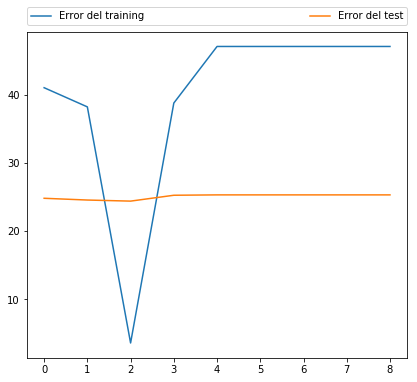

In [38]:
leaveOneOut(X,Y,y_sigma_obs)

In [41]:
def kFold(x,y,y_sigma,k):
    MSE1 = []
    MSE2 = []
    fig = plt.figure(figsize=(20,15))
    fittings = fig.add_subplot(121)
    for i in range(1,10):
        MSE1_aPromediar = []
        MSE2_aPromediar = []
        for j in range(k):
            yes = np.split(y,k)
            exices = np.split(x,k)
            y_test = yes[j]
            x_test = exices[j]
            y_training = np.delete(yes,j,0)
            x_training = np.delete(exices,j,0)
            x_training=np.concatenate(x_training)
            y_training=np.concatenate(y_training)
            param, posterior = metropolis(x_training, y_training,y_sigma,i)
            model_training = model(x_training, np.mean(param, axis=0))
            Error1 = 1/10*sum(((y_training-model(x_training,np.mean(param, axis=0)))/y_sigma)**2)
            Error2 = 1/10*sum(((y_test-model(x_test,np.mean(param, axis=0)))/y_sigma)**2)
            MSE1_aPromediar.append(Error1)
            MSE2_aPromediar.append(Error2)
        la=np.average(MSE1_aPromediar)
        ba=np.average(MSE2_aPromediar)
        np.append(MSE1,la)
        np.append(MSE2,ba)
    x= np.arange(9)
    MSES = fig.add_subplot(122)
    print(np.shape(MSE1))
    MSES.scatter(x,MSE1, label='Error del training')
    MSES.scatter(x,MSE2, label = 'Error del test')
    MSES.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
    fig.show()


ValueError: array split does not result in an equal division

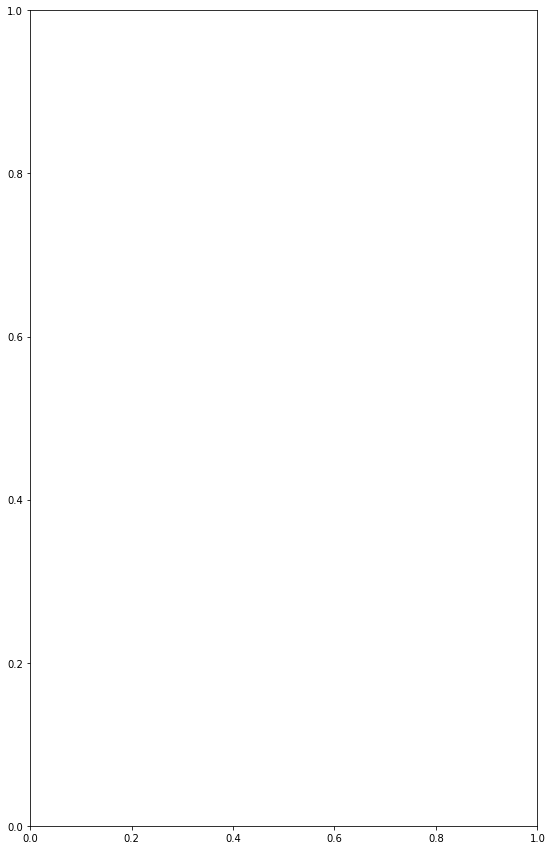

In [47]:
#No me deja splitearlos pues no da una division entera
kFold(X,Y,y_sigma_obs,7)
